# Imports

In [78]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
test=yf.Ticker('AAPL')
test.info.get('currentPrice')

210.825

# Ticker List

In [33]:
tickers = [
    "ITC.NS", "HINDUNILVR.NS", "POWERGRID.NS", "COALINDIA.NS", "NTPC.NS",
    "BAJAJ-AUTO.NS", "NESTLEIND.NS", "HDFCLIFE.NS", "PGHH.NS", "PIDILITIND.NS",
    "ADANIENT.NS", "RELIANCE.NS", "TATAMOTORS.NS", "IDEA.NS", "ZEEL.NS",
    "INDUSINDBK.NS", "YESBANK.NS", "BANDHANBNK.NS", "IRCTC.NS",
    "SBIN.NS", "PNB.NS", "ICICIBANK.NS", "TATAPOWER.NS", "TATACHEM.NS",
    "VOLTAS.NS", "SAIL.NS", "ASHOKLEY.NS", "BANKBARODA.NS", "DLF.NS"
]

len(tickers)


29

# Storing relevent details of Tickers in a Pandas Dataframe

In [35]:
stock_data=[]
for ticker in tickers:
     try:
        info=yf.Ticker(ticker).info
        stock_data.append({
            'ticker':ticker,
            'currentPrice':info.get('currentPrice'),
            'beta':info.get('beta'),
            'marketCap':info.get('marketCap'),
            'volume': info.get('volume'),
            'dividendYield': info.get('dividendYield'),
            'sector': info.get('sector')
        })
        print(f"Fetched: {ticker}")
     except Exception as e:
        print(f"Failed: {ticker} - {e}")
dataset=pd.DataFrame(stock_data)
print(dataset.head())
print(dataset.describe())

Fetched: ITC.NS
Fetched: HINDUNILVR.NS
Fetched: POWERGRID.NS
Fetched: COALINDIA.NS
Fetched: NTPC.NS
Fetched: BAJAJ-AUTO.NS
Fetched: NESTLEIND.NS
Fetched: HDFCLIFE.NS
Fetched: PGHH.NS
Fetched: PIDILITIND.NS
Fetched: ADANIENT.NS
Fetched: RELIANCE.NS
Fetched: TATAMOTORS.NS
Fetched: IDEA.NS
Fetched: ZEEL.NS
Fetched: INDUSINDBK.NS
Fetched: YESBANK.NS
Fetched: BANDHANBNK.NS
Fetched: IRCTC.NS
Fetched: SBIN.NS
Fetched: PNB.NS
Fetched: ICICIBANK.NS
Fetched: TATAPOWER.NS
Fetched: TATACHEM.NS
Fetched: VOLTAS.NS
Fetched: SAIL.NS
Fetched: ASHOKLEY.NS
Fetched: BANKBARODA.NS
Fetched: DLF.NS
          ticker  currentPrice   beta      marketCap    volume  dividendYield  \
0         ITC.NS        416.80  0.055  5217293697024   8577381           3.77   
1  HINDUNILVR.NS       2519.60  0.367  5924688232448   7241739           2.09   
2   POWERGRID.NS        298.55  0.258  2776693997568   7072933           5.00   
3   COALINDIA.NS        380.95  0.033  2348915097600   4675734           8.06   
4        NTP

# Handling NULL/Missing values

In [37]:
dataset.isnull()

,ticker,currentPrice,beta,marketCap,volume,dividendYield,sector
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [38]:
dataset_cleaned=dataset.dropna(subset=dataset.columns.difference(['ticker']),how='all')

In [39]:
dataset_cleaned['dividendYield'].isnull().sum()

2

## Handling missing values in Dividend Yield

In [41]:
missing_dividend_tickers = dataset[dataset['dividendYield'].isna()]['ticker'].tolist()
missing_dividend_tickers

['IDEA.NS', 'YESBANK.NS']

In [42]:
dy_test=yf.Ticker(missing_dividend_tickers[0])
(dy_test.history(period='10y',interval='3mo')['Dividends'])

Date
2015-07-01 00:00:00+05:30    0.361781
2015-10-01 00:00:00+05:30    0.000000
2016-01-01 00:00:00+05:30    0.000000
2016-04-01 00:00:00+05:30    0.000000
2016-07-01 00:00:00+05:30    0.361781
2016-10-01 00:00:00+05:30    0.000000
2017-01-01 00:00:00+05:30    0.000000
2017-04-01 00:00:00+05:30    0.000000
2017-07-01 00:00:00+05:30    0.000000
2017-10-01 00:00:00+05:30    0.000000
2018-01-01 00:00:00+05:30    0.000000
2018-04-01 00:00:00+05:30    0.000000
2018-07-01 00:00:00+05:30    0.000000
2018-10-01 00:00:00+05:30    0.000000
2019-01-01 00:00:00+05:30    0.000000
2019-04-01 00:00:00+05:30    0.000000
2019-07-01 00:00:00+05:30    0.000000
2019-10-01 00:00:00+05:30    0.000000
2020-01-01 00:00:00+05:30    0.000000
2020-04-01 00:00:00+05:30    0.000000
2020-07-01 00:00:00+05:30    0.000000
2020-10-01 00:00:00+05:30    0.000000
2021-01-01 00:00:00+05:30    0.000000
2021-04-01 00:00:00+05:30    0.000000
2021-07-01 00:00:00+05:30    0.000000
2021-10-01 00:00:00+05:30    0.000000
2022-01

#### see if a company has atleast 5 non-zero dividend values in the past 10 years. If yes, then apply time series forecasting to predict the missing dividend yield value, else fill the value with 0.

In [44]:
def forecast_dividend_yield(series,ticker_symbol):
    try:
        series = series[series > 0]
        series.index = pd.to_datetime(series.index)
        series = series.resample('Q').sum()

        if len(series) < 6:
            return series.mean() 
        model = ExponentialSmoothing(series, trend='add', seasonal=None).fit()
        forecast = model.forecast(1)[0]
        price_series = yf.download(ticker_symbol, period="1d")['Close']
        latest_price = price_series[-1] if not price_series.empty else 1
        return round((forecast * 4 / latest_price) * 100, 2)

    except Exception as e:
        print(f"Forecast failed: {e}")
        return series.mean()

def handle_missing_dividendYield(missing_dividend_ticker, threshold=5):
    ticker = yf.Ticker(missing_dividend_ticker)
    try:
        dividend_history = ticker.history(period="10y")["Dividends"]
        non_zero_count = (dividend_history > 0).sum()
        if non_zero_count < threshold:
            return 0.0 
        else:
            return forecast_dividend_yield(dividend_history,missing_dividend_ticker)
    except Exception as e:
        print(f"Error fetching data for {missing_dividend_ticker}: {e}")
        return 0.0

In [45]:
for ticker in missing_dividend_tickers:
    dataset.loc[dataset['ticker'] == ticker, 'dividendYield'] = handle_missing_dividendYield(ticker)


## Handling missing values in Current Price

In [63]:
missing_currentPrice_tickers = dataset[dataset['currentPrice'].isna()]['ticker'].tolist()
missing_currentPrice_tickers

[]

### Let's fallback to last to the recent closing price

In [68]:
def handle_missing_current_price(ticker_symbol):
    try:
        ticker = yf.Ticker(ticker_symbol)
        price = ticker.info.get('currentPrice', None)
        if price is None:
            hist = ticker.history(period="1d", interval="1m")
            if not hist.empty and 'Close' in hist.columns:
                price = hist['Close'].iloc[-1]
                print(f"Fetched fallback price for {ticker_symbol}: {price}")
        
        return price if price is not None else np.nan
    except Exception as e:
        print(f"Error fetching price for {ticker_symbol}: {e}")
        return np.nan

In [70]:
price_map = {}
for ticker in missing_currentPrice_tickers:
    price_map[ticker] = handle_missing_current_price(ticker)

dataset['currentPrice'] = dataset.apply(
    lambda row: price_map[row['ticker']] if pd.isna(row['currentPrice']) and row['ticker'] in price_map else row['currentPrice'],
    axis=1
)

## Handling missing values in Beta

### Let's see the correlation between Beta and other Features

In [74]:
df_beta_notna = dataset[dataset['beta'].notna()]
numeric_cols = df_beta_notna.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('beta')
correlations = df_beta_notna[numeric_cols + ['beta']].corr()
print(correlations['beta'].sort_values(ascending=False))

beta             1.000000
currentPrice     0.004176
marketCap       -0.021689
dividendYield   -0.172520
volume          -0.349374
Name: beta, dtype: float64


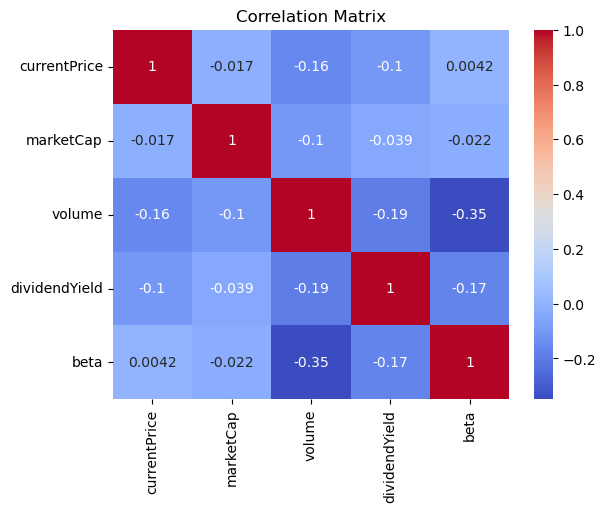

In [80]:
sns.heatmap(df_beta_notna[numeric_cols + ['beta']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()